In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import expon
from scipy.stats import norm
from scipy import stats

from collections import Counter

from math import radians, cos, sin, asin, sqrt

import warnings
#忽略报错方法
def ignore_warn(*args, **kwargs):
    pass
    warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [4]:
#导入数据
# df = pd.read_csv('步骤三后的数据.csv')
path = 'C:\\Users\\ASUS\\Desktop\\IOM魔改2\\IOM209\\步骤三后的数据.csv'
try:
    # 将 low_memory 设置为 False
    df = pd.read_csv(path, low_memory=False)
    print("文件读取成功")
except FileNotFoundError:
    print("文件未找到，请检查文件路径。")
except Exception as e:
    print(f"发生其他错误: {e}")

文件读取成功


In [5]:
df.dtypes

Lng                    float64
Lat                    float64
tradeTime                int64
followers                int64
totalPrice             float64
price                  float64
square                 float64
livingRoom               int64
drawingRoom              int64
kitchen                float64
bathRoom                 int64
floor                   object
buildingType           float64
constructionTime       float64
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator                 int64
fiveYearsProperty        int64
subway                   int64
district                 int64
communityAverage       float64
distance               float64
Age                      int64
floorType              float64
floorHeight              int64
dtype: object

In [6]:
#已经处理floor了，所以可以删除
df=df.drop(['floor'], axis=1)

In [7]:
df

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,distance,Age,floorType,floorHeight
0,116.475489,40.019520,2016,106,415.0,31680.0,131.00,2,1,1.0,...,0.217,1,0,1,7,56021.0,14.385302,11,4.0,26
1,116.453917,39.881534,2016,126,575.0,43436.0,132.38,2,2,1.0,...,0.667,1,1,0,7,71539.0,6.051819,12,4.0,22
2,116.561978,39.877145,2016,48,1030.0,52021.0,198.00,3,2,1.0,...,0.500,1,0,0,7,48160.0,14.930543,11,3.0,4
3,116.438010,40.076114,2016,138,297.5,22202.0,134.00,3,1,1.0,...,0.273,1,0,0,6,51238.0,19.183033,8,1.0,21
4,116.428392,39.886229,2016,286,392.0,48396.0,81.00,2,1,1.0,...,0.333,0,1,1,1,62588.0,3.928671,56,3.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,116.344294,39.889416,2012,0,168.0,29428.0,57.09,3,1,1.0,...,0.333,0,1,1,10,84021.0,4.488653,30,3.0,5
277425,116.386269,39.888411,2012,0,234.0,32664.0,71.64,3,1,1.0,...,0.500,0,1,1,10,104198.0,2.149080,16,3.0,9
277426,116.366087,39.894322,2012,0,349.0,34270.0,101.84,2,2,1.0,...,0.300,1,1,1,10,86359.0,2.602217,13,3.0,5
277427,116.352899,39.889225,2012,0,144.0,27068.0,53.20,2,1,1.0,...,0.500,0,1,1,10,79570.0,3.855649,26,3.0,24


In [8]:
#现在开始构造特征

In [9]:
# 房间总数
df['room_count'] = df['livingRoom'] + df['drawingRoom'] + df['bathRoom'] + df['kitchen']

In [10]:
# 每房平均面积
df['room_ratio'] = df['square'] / df['room_count']

In [11]:
#由于北京基础设施特性，构建南北特征
# 长安街为北纬39.90755
city_center_latitude = 39.90755

# 定义一个函数，用于判断某个位置相对于城市中心的南北方向
def determine_north_south(latitude):
    # 如果该位置的纬度大于城市中心纬度，判定为在城市北方
    if latitude > city_center_latitude:
        return '1'
    # 如果该位置的纬度小于城市中心纬度，判定为在城市南方
    elif latitude < city_center_latitude:
        return '-1'
    # 如果该位置的纬度等于城市中心纬度，判定为在城市中心
    else:
        return '0'
# 并将结果存储在新的 north_south 列中
df['north_south'] = df['Lat'].apply(determine_north_south)

In [12]:
df

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,subway,district,communityAverage,distance,Age,floorType,floorHeight,room_count,room_ratio,north_south
0,116.475489,40.019520,2016,106,415.0,31680.0,131.00,2,1,1.0,...,1,7,56021.0,14.385302,11,4.0,26,5.0,26.200000,1
1,116.453917,39.881534,2016,126,575.0,43436.0,132.38,2,2,1.0,...,0,7,71539.0,6.051819,12,4.0,22,7.0,18.911429,-1
2,116.561978,39.877145,2016,48,1030.0,52021.0,198.00,3,2,1.0,...,0,7,48160.0,14.930543,11,3.0,4,9.0,22.000000,-1
3,116.438010,40.076114,2016,138,297.5,22202.0,134.00,3,1,1.0,...,0,6,51238.0,19.183033,8,1.0,21,6.0,22.333333,1
4,116.428392,39.886229,2016,286,392.0,48396.0,81.00,2,1,1.0,...,1,1,62588.0,3.928671,56,3.0,6,5.0,16.200000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,116.344294,39.889416,2012,0,168.0,29428.0,57.09,3,1,1.0,...,1,10,84021.0,4.488653,30,3.0,5,6.0,9.515000,-1
277425,116.386269,39.888411,2012,0,234.0,32664.0,71.64,3,1,1.0,...,1,10,104198.0,2.149080,16,3.0,9,6.0,11.940000,-1
277426,116.366087,39.894322,2012,0,349.0,34270.0,101.84,2,2,1.0,...,1,10,86359.0,2.602217,13,3.0,5,6.0,16.973333,-1
277427,116.352899,39.889225,2012,0,144.0,27068.0,53.20,2,1,1.0,...,1,10,79570.0,3.855649,26,3.0,24,5.0,10.640000,-1


In [13]:
# 经济数据特征
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'M2': [85159090000000, 72585180000000, 97414886583000, 110652500263258, 122837482925283, 139227813190717, 155006666873100, 182674420000000, 169023531000000],
    'Beijing GDP': [1718880000000, 1496400000000, 1902470000000, 2113460000000, 2292600000000, 2477910000000, 2704120000000, 2988300000000, 3310600000000],
    'Per Capita Disposable Income in Beijing': [29228, 33176, 36817, 40830, 44489, 48458, 52530, 57230, 62361],
    'Investment in residential real estate development in Beijing': [150895000000, 177831000000, 162799000000, 172456000000, 184608000000, 188954000000, 192586000000, 169467000000, 202606000000],
    'Inflation rate': [0.0207, 0.0159, 0.02, 0.0144, 0.0192, 0.0262, 0.0262, 0.0555, 0.0318]
}

# 创建 DataFrame
economics_data = pd.DataFrame(data)

# 将各列转换为整数类型
# for column in economics_data.columns:
#     economics_data[column] = economics_data[column].astype('int64')


economics_data

,Year,M2,Beijing GDP,Per Capita Disposable Income in Beijing,Investment in residential real estate development in Beijing,Inflation rate
0,2010,85159090000000,1718880000000,29228,150895000000,0.0207
1,2011,72585180000000,1496400000000,33176,177831000000,0.0159
2,2012,97414886583000,1902470000000,36817,162799000000,0.0200
3,2013,110652500263258,2113460000000,40830,172456000000,0.0144
4,2014,122837482925283,2292600000000,44489,184608000000,0.0192
5,2015,139227813190717,2477910000000,48458,188954000000,0.0262
6,2016,155006666873100,2704120000000,52530,192586000000,0.0262
7,2017,182674420000000,2988300000000,57230,169467000000,0.0555
8,2018,169023531000000,3310600000000,62361,202606000000,0.0318


In [14]:
df

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,subway,district,communityAverage,distance,Age,floorType,floorHeight,room_count,room_ratio,north_south
0,116.475489,40.019520,2016,106,415.0,31680.0,131.00,2,1,1.0,...,1,7,56021.0,14.385302,11,4.0,26,5.0,26.200000,1
1,116.453917,39.881534,2016,126,575.0,43436.0,132.38,2,2,1.0,...,0,7,71539.0,6.051819,12,4.0,22,7.0,18.911429,-1
2,116.561978,39.877145,2016,48,1030.0,52021.0,198.00,3,2,1.0,...,0,7,48160.0,14.930543,11,3.0,4,9.0,22.000000,-1
3,116.438010,40.076114,2016,138,297.5,22202.0,134.00,3,1,1.0,...,0,6,51238.0,19.183033,8,1.0,21,6.0,22.333333,1
4,116.428392,39.886229,2016,286,392.0,48396.0,81.00,2,1,1.0,...,1,1,62588.0,3.928671,56,3.0,6,5.0,16.200000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,116.344294,39.889416,2012,0,168.0,29428.0,57.09,3,1,1.0,...,1,10,84021.0,4.488653,30,3.0,5,6.0,9.515000,-1
277425,116.386269,39.888411,2012,0,234.0,32664.0,71.64,3,1,1.0,...,1,10,104198.0,2.149080,16,3.0,9,6.0,11.940000,-1
277426,116.366087,39.894322,2012,0,349.0,34270.0,101.84,2,2,1.0,...,1,10,86359.0,2.602217,13,3.0,5,6.0,16.973333,-1
277427,116.352899,39.889225,2012,0,144.0,27068.0,53.20,2,1,1.0,...,1,10,79570.0,3.855649,26,3.0,24,5.0,10.640000,-1


In [15]:
#加入经济学数据
economics_data.rename(columns={'Year': 'year'}, inplace=True)
# 直接合并数据
df = pd.merge(df, economics_data, left_on='tradeTime', right_on='year', how='left')
df = df.drop(columns=['year'])

columns_to_convert = ['M2','Beijing GDP','Per Capita Disposable Income in Beijing','Investment in residential real estate development in Beijing','Inflation rate']
# 将指定列转换为高精度的小数类型（使用 numpy 的 float64）
for col in columns_to_convert:
    df[col] = df[col].astype(np.float64)

df


,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,floorType,floorHeight,room_count,room_ratio,north_south,M2,Beijing GDP,Per Capita Disposable Income in Beijing,Investment in residential real estate development in Beijing,Inflation rate
0,116.475489,40.019520,2016,106,415.0,31680.0,131.00,2,1,1.0,...,4.0,26,5.0,26.200000,1,1.550067e+14,2.704120e+12,52530.0,1.925860e+11,0.0262
1,116.453917,39.881534,2016,126,575.0,43436.0,132.38,2,2,1.0,...,4.0,22,7.0,18.911429,-1,1.550067e+14,2.704120e+12,52530.0,1.925860e+11,0.0262
2,116.561978,39.877145,2016,48,1030.0,52021.0,198.00,3,2,1.0,...,3.0,4,9.0,22.000000,-1,1.550067e+14,2.704120e+12,52530.0,1.925860e+11,0.0262
3,116.438010,40.076114,2016,138,297.5,22202.0,134.00,3,1,1.0,...,1.0,21,6.0,22.333333,1,1.550067e+14,2.704120e+12,52530.0,1.925860e+11,0.0262
4,116.428392,39.886229,2016,286,392.0,48396.0,81.00,2,1,1.0,...,3.0,6,5.0,16.200000,-1,1.550067e+14,2.704120e+12,52530.0,1.925860e+11,0.0262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,116.344294,39.889416,2012,0,168.0,29428.0,57.09,3,1,1.0,...,3.0,5,6.0,9.515000,-1,9.741489e+13,1.902470e+12,36817.0,1.627990e+11,0.0200
277425,116.386269,39.888411,2012,0,234.0,32664.0,71.64,3,1,1.0,...,3.0,9,6.0,11.940000,-1,9.741489e+13,1.902470e+12,36817.0,1.627990e+11,0.0200
277426,116.366087,39.894322,2012,0,349.0,34270.0,101.84,2,2,1.0,...,3.0,5,6.0,16.973333,-1,9.741489e+13,1.902470e+12,36817.0,1.627990e+11,0.0200
277427,116.352899,39.889225,2012,0,144.0,27068.0,53.20,2,1,1.0,...,3.0,24,5.0,10.640000,-1,9.741489e+13,1.902470e+12,36817.0,1.627990e+11,0.0200


In [16]:
#由于经济学数据太大
columns_to_transform = ['M2', 'Beijing GDP',
                        'Per Capita Disposable Income in Beijing',
                        'Investment in residential real estate development in Beijing']

# 检查数据中是否有小于等于 0 的值，若有则需要进行平移处理
if (df[columns_to_transform] <= 0).any().any():
    # 加 1 避免出现 log(0) 的情况
    df[columns_to_transform] = np.log(df[columns_to_transform] + 1)
else:
    df[columns_to_transform] = np.log(df[columns_to_transform])


In [17]:
df

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,floorType,floorHeight,room_count,room_ratio,north_south,M2,Beijing GDP,Per Capita Disposable Income in Beijing,Investment in residential real estate development in Beijing,Inflation rate
0,116.475489,40.019520,2016,106,415.0,31680.0,131.00,2,1,1.0,...,4.0,26,5.0,26.200000,1,32.674489,28.625798,10.869140,25.983809,0.0262
1,116.453917,39.881534,2016,126,575.0,43436.0,132.38,2,2,1.0,...,4.0,22,7.0,18.911429,-1,32.674489,28.625798,10.869140,25.983809,0.0262
2,116.561978,39.877145,2016,48,1030.0,52021.0,198.00,3,2,1.0,...,3.0,4,9.0,22.000000,-1,32.674489,28.625798,10.869140,25.983809,0.0262
3,116.438010,40.076114,2016,138,297.5,22202.0,134.00,3,1,1.0,...,1.0,21,6.0,22.333333,1,32.674489,28.625798,10.869140,25.983809,0.0262
4,116.428392,39.886229,2016,286,392.0,48396.0,81.00,2,1,1.0,...,3.0,6,5.0,16.200000,-1,32.674489,28.625798,10.869140,25.983809,0.0262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,116.344294,39.889416,2012,0,168.0,29428.0,57.09,3,1,1.0,...,3.0,5,6.0,9.515000,-1,32.210000,28.274174,10.513715,25.815782,0.0200
277425,116.386269,39.888411,2012,0,234.0,32664.0,71.64,3,1,1.0,...,3.0,9,6.0,11.940000,-1,32.210000,28.274174,10.513715,25.815782,0.0200
277426,116.366087,39.894322,2012,0,349.0,34270.0,101.84,2,2,1.0,...,3.0,5,6.0,16.973333,-1,32.210000,28.274174,10.513715,25.815782,0.0200
277427,116.352899,39.889225,2012,0,144.0,27068.0,53.20,2,1,1.0,...,3.0,24,5.0,10.640000,-1,32.210000,28.274174,10.513715,25.815782,0.0200


In [18]:
#计算特征之间的相关性
correlation_matrix = df.corr()

In [19]:
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

price                                                           1.000000
communityAverage                                                0.684370
totalPrice                                                      0.651869
M2                                                              0.565272
tradeTime                                                       0.562538
Beijing GDP                                                     0.557340
Per Capita Disposable Income in Beijing                         0.557248
Inflation rate                                                  0.535620
renovationCondition                                             0.311570
Age                                                             0.291276
followers                                                       0.280677
subway                                                          0.224412
north_south                                                     0.077794
buildingStructure                                  

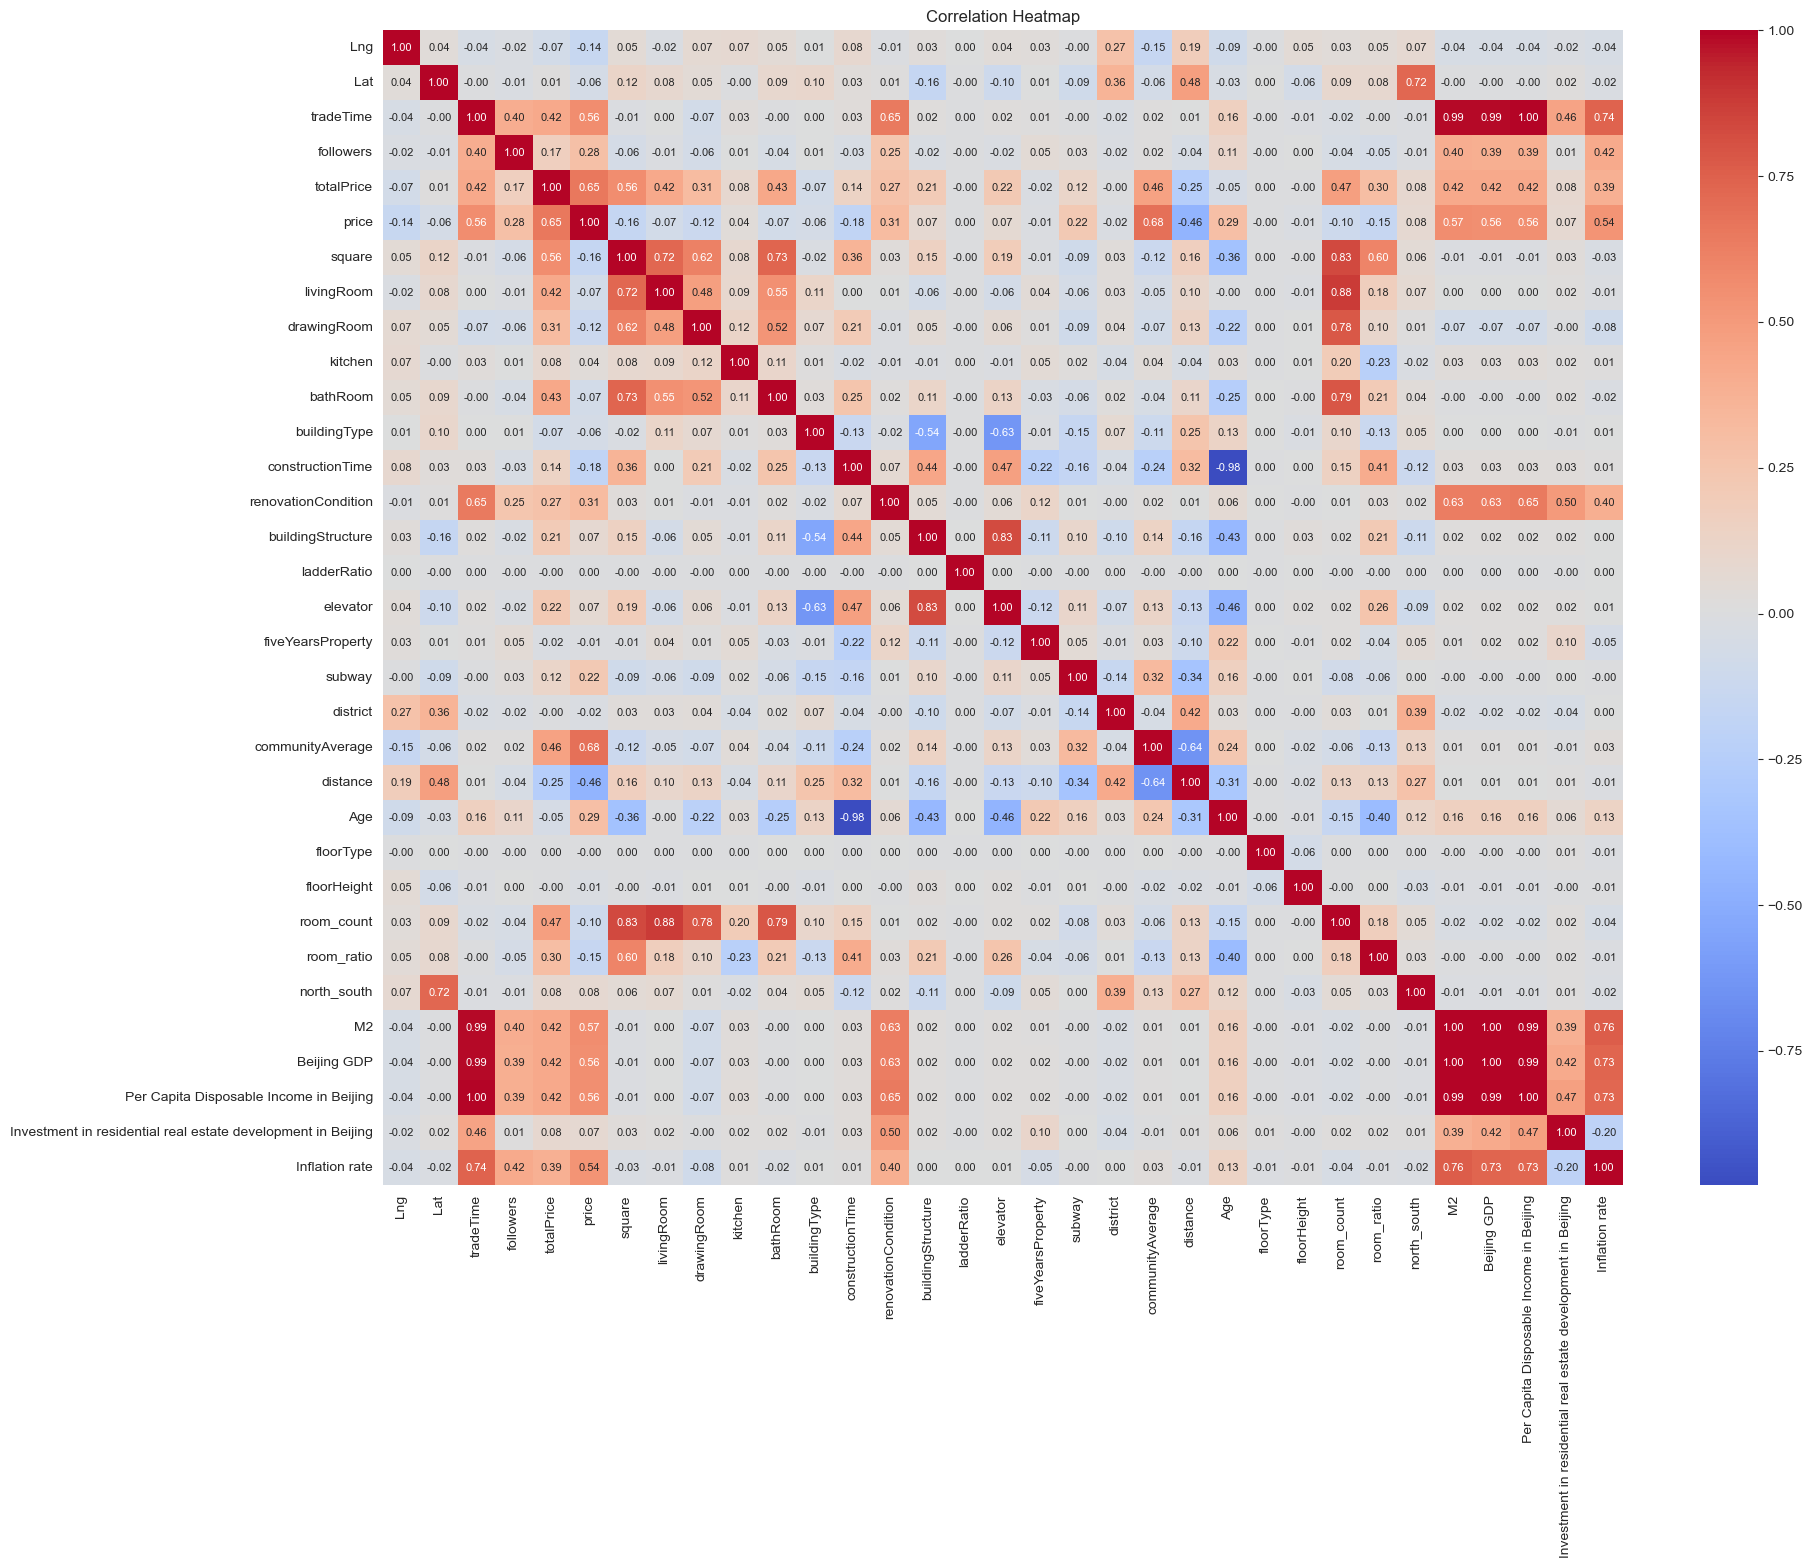

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
#处理强相关的列，减少数据重复
#TODO跟价格是不是没关系啊
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

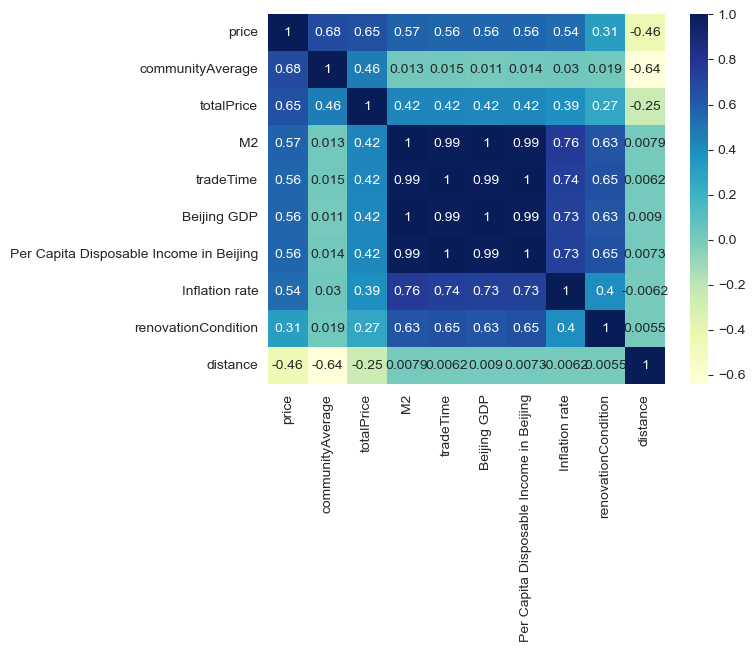

In [21]:
#这里选出相关性高于0.3的
high_corr_features = correlation_with_price[abs(correlation_with_price) > 0.3]
sns.heatmap(df[high_corr_features.index].corr(), annot=True, cmap='YlGnBu')

In [22]:
cols_to_drop = [
    'totalPrice',          # 与 price 强相关，含面积
    'Lat', 'Lng',          # 空间特征已由 distance 代替
    'M2',
    'Beijing GDP',
    'Per Capita Disposable Income in Beijing',
    'Inflation rate'
]
df = df.drop(columns=cols_to_drop)

In [23]:
df

,tradeTime,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,...,district,communityAverage,distance,Age,floorType,floorHeight,room_count,room_ratio,north_south,Investment in residential real estate development in Beijing
0,2016,106,31680.0,131.00,2,1,1.0,1,1.0,2005.0,...,7,56021.0,14.385302,11,4.0,26,5.0,26.200000,1,25.983809
1,2016,126,43436.0,132.38,2,2,1.0,2,1.0,2004.0,...,7,71539.0,6.051819,12,4.0,22,7.0,18.911429,-1,25.983809
2,2016,48,52021.0,198.00,3,2,1.0,3,4.0,2005.0,...,7,48160.0,14.930543,11,3.0,4,9.0,22.000000,-1,25.983809
3,2016,138,22202.0,134.00,3,1,1.0,1,1.0,2008.0,...,6,51238.0,19.183033,8,1.0,21,6.0,22.333333,1,25.983809
4,2016,286,48396.0,81.00,2,1,1.0,1,4.0,1960.0,...,1,62588.0,3.928671,56,3.0,6,5.0,16.200000,-1,25.983809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,2012,0,29428.0,57.09,3,1,1.0,1,4.0,1982.0,...,10,84021.0,4.488653,30,3.0,5,6.0,9.515000,-1,25.815782
277425,2012,0,32664.0,71.64,3,1,1.0,1,4.0,1996.0,...,10,104198.0,2.149080,16,3.0,9,6.0,11.940000,-1,25.815782
277426,2012,0,34270.0,101.84,2,2,1.0,1,1.0,1999.0,...,10,86359.0,2.602217,13,3.0,5,6.0,16.973333,-1,25.815782
277427,2012,0,27068.0,53.20,2,1,1.0,1,4.0,1986.0,...,10,79570.0,3.855649,26,3.0,24,5.0,10.640000,-1,25.815782


price                                                           1.000000
communityAverage                                                0.684370
tradeTime                                                       0.562538
renovationCondition                                             0.311570
Age                                                             0.291276
followers                                                       0.280677
subway                                                          0.224412
north_south                                                     0.077794
buildingStructure                                               0.074849
Investment in residential real estate development in Beijing    0.073287
elevator                                                        0.070324
kitchen                                                         0.036013
ladderRatio                                                     0.001262
floorType                                          

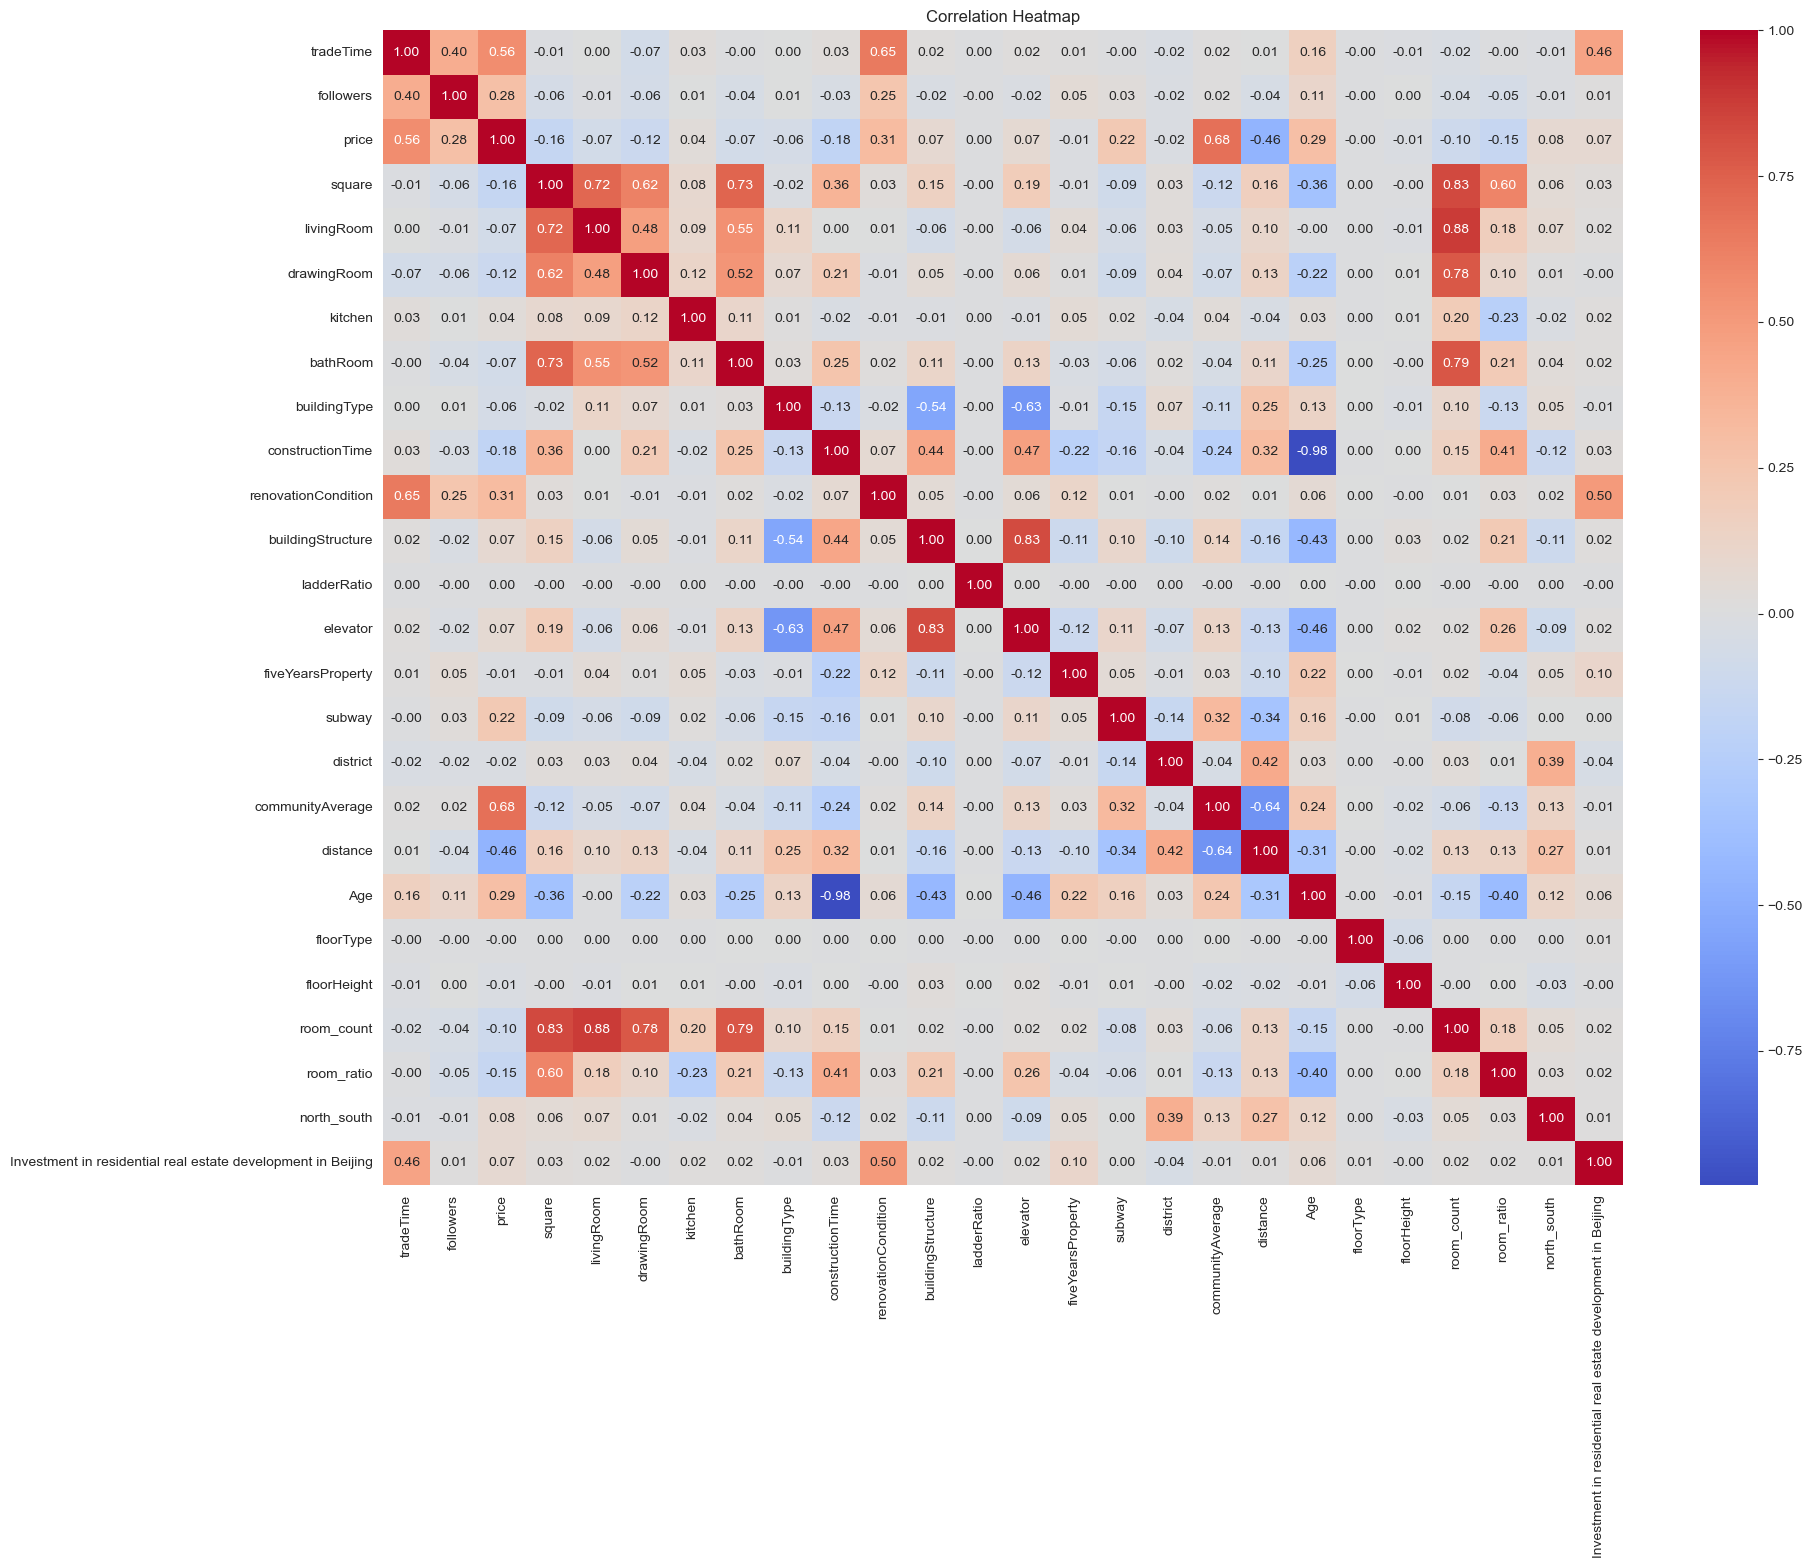

<Axes: >

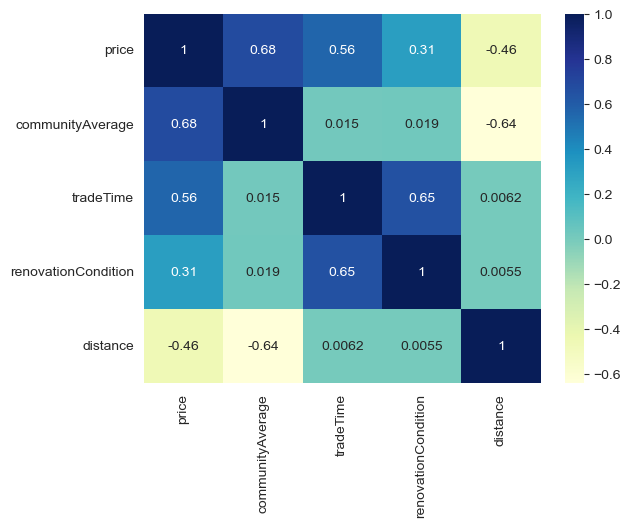

In [24]:
#计算特征之间的相关性
correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)
import matplotlib.pyplot as plt
import seaborn as sns

#处理强相关的列，减少数据重复
#TODO跟价格是不是没关系啊
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
#这里选出相关性高于0.3的
high_corr_features = correlation_with_price[abs(correlation_with_price) > 0.3]
sns.heatmap(df[high_corr_features.index].corr(), annot=True, cmap='YlGnBu')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277429 entries, 0 to 277428
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   tradeTime                                                     277429 non-null  int64  
 1   followers                                                     277429 non-null  int64  
 2   price                                                         277429 non-null  float64
 3   square                                                        277429 non-null  float64
 4   livingRoom                                                    277429 non-null  int64  
 5   drawingRoom                                                   277429 non-null  int64  
 6   kitchen                                                       277429 non-null  float64
 7   bathRoom                                                

In [26]:
#找出四个相关性最高的变量

In [27]:
#实际上取了所有的特征
selected_features = [
    'tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
    'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 
    'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty', 
    'subway', 'district', 'communityAverage', 'distance', 'Age', 
    'floorType', 'floorHeight', 'room_count', 'room_ratio'
]

# 计算这些特征与 price 的相关性，并按绝对值排序
correlation_sorted = df[selected_features + ['price']].corr()['price'].drop('price').abs().sort_values(ascending=False)

# 只看前 4 个最相关的
print(correlation_sorted.head(4))

communityAverage       0.684370
tradeTime              0.562538
distance               0.457901
renovationCondition    0.311570
Name: price, dtype: float64


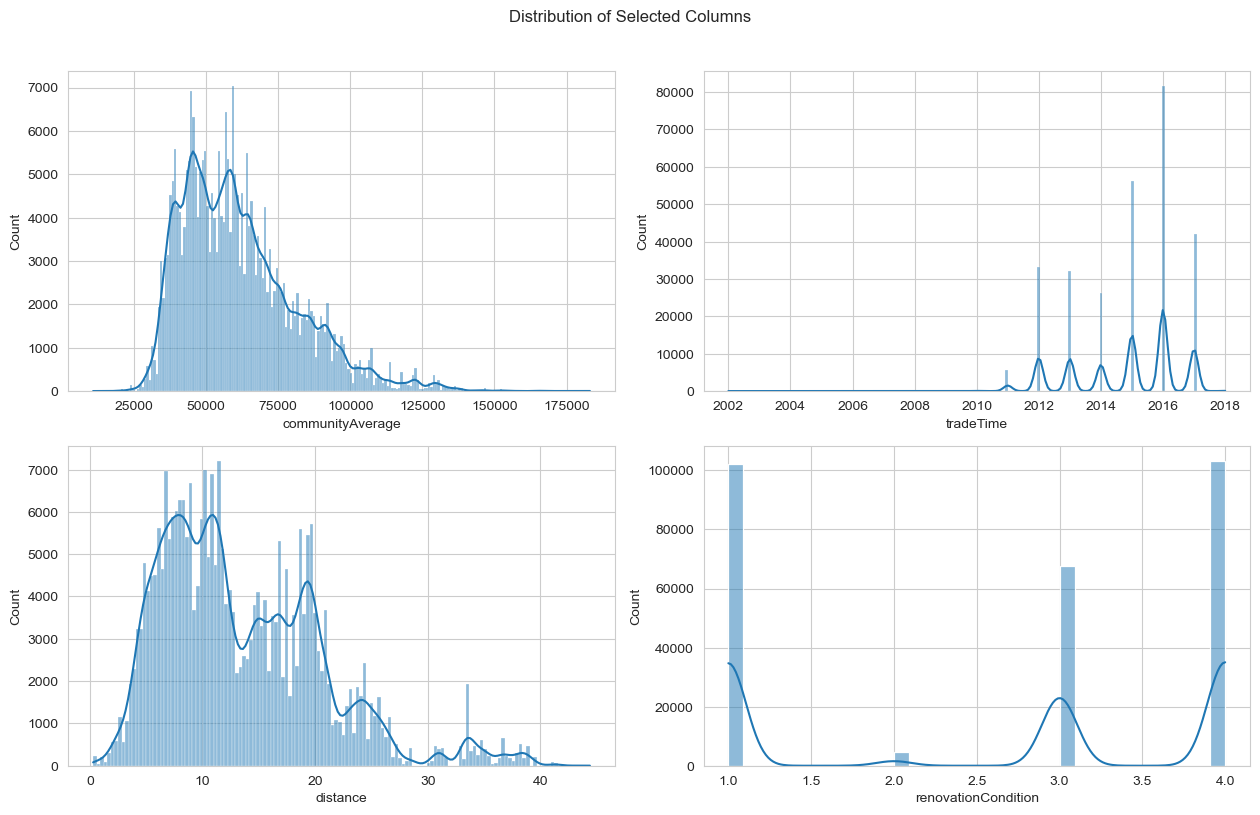

In [28]:
#分析与price最相关的四个特征的分布
selected_columns = ['communityAverage', 'tradeTime', 'distance', 'renovationCondition']
selected_data = df[selected_columns]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12.7,8.27))
fig.suptitle('Distribution of Selected Columns')

for i, col in enumerate(selected_columns):
    sns.histplot(selected_data[col], kde=True, ax=axes[i // 2, i % 2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

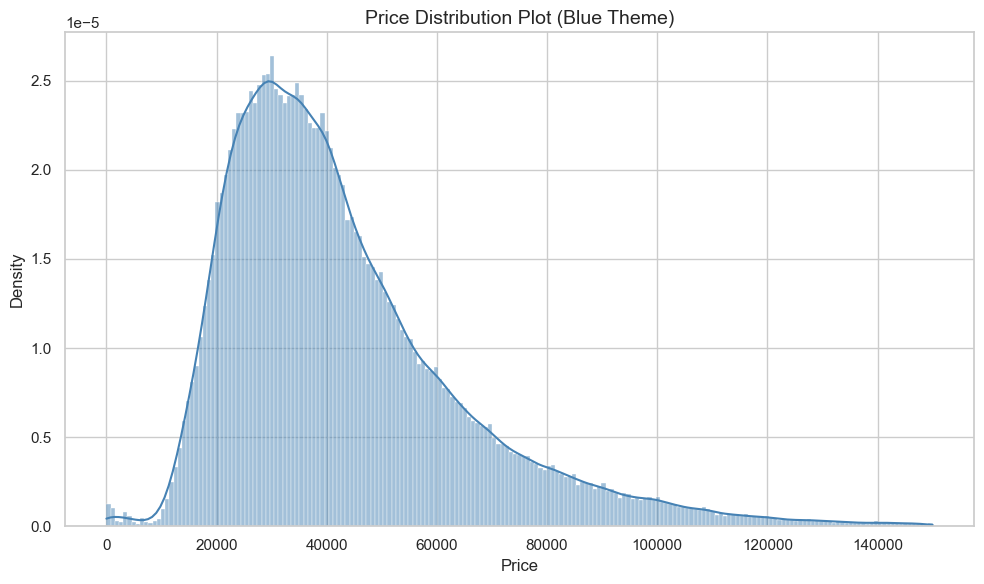

In [29]:
#价格变量的可视化
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 6))

# 价格分布图
sns.histplot(
    df['price'], 
    kde=True,                # 显示平滑的分布曲线
    stat="density",          # Y轴使用密度单位
    color="steelblue",       # 鱿鱼女子在安徽
    ax=axes
)

# 添加标题和坐标轴标签
axes.set_title('Price Distribution Plot (Blue Theme)', fontsize=14)
axes.set_xlabel('Price', fontsize=12)
axes.set_ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
df

,tradeTime,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,...,district,communityAverage,distance,Age,floorType,floorHeight,room_count,room_ratio,north_south,Investment in residential real estate development in Beijing
0,2016,106,31680.0,131.00,2,1,1.0,1,1.0,2005.0,...,7,56021.0,14.385302,11,4.0,26,5.0,26.200000,1,25.983809
1,2016,126,43436.0,132.38,2,2,1.0,2,1.0,2004.0,...,7,71539.0,6.051819,12,4.0,22,7.0,18.911429,-1,25.983809
2,2016,48,52021.0,198.00,3,2,1.0,3,4.0,2005.0,...,7,48160.0,14.930543,11,3.0,4,9.0,22.000000,-1,25.983809
3,2016,138,22202.0,134.00,3,1,1.0,1,1.0,2008.0,...,6,51238.0,19.183033,8,1.0,21,6.0,22.333333,1,25.983809
4,2016,286,48396.0,81.00,2,1,1.0,1,4.0,1960.0,...,1,62588.0,3.928671,56,3.0,6,5.0,16.200000,-1,25.983809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,2012,0,29428.0,57.09,3,1,1.0,1,4.0,1982.0,...,10,84021.0,4.488653,30,3.0,5,6.0,9.515000,-1,25.815782
277425,2012,0,32664.0,71.64,3,1,1.0,1,4.0,1996.0,...,10,104198.0,2.149080,16,3.0,9,6.0,11.940000,-1,25.815782
277426,2012,0,34270.0,101.84,2,2,1.0,1,1.0,1999.0,...,10,86359.0,2.602217,13,3.0,5,6.0,16.973333,-1,25.815782
277427,2012,0,27068.0,53.20,2,1,1.0,1,4.0,1986.0,...,10,79570.0,3.855649,26,3.0,24,5.0,10.640000,-1,25.815782


In [31]:
#可以看到呈现明显的偏态
import numpy as np
#进行对数变换，把极端高价压缩下来，让分布更加对称、接近正态
df['price_log'] = np.log1p(df['price'])  # log(1 + x)，避免 log(0)

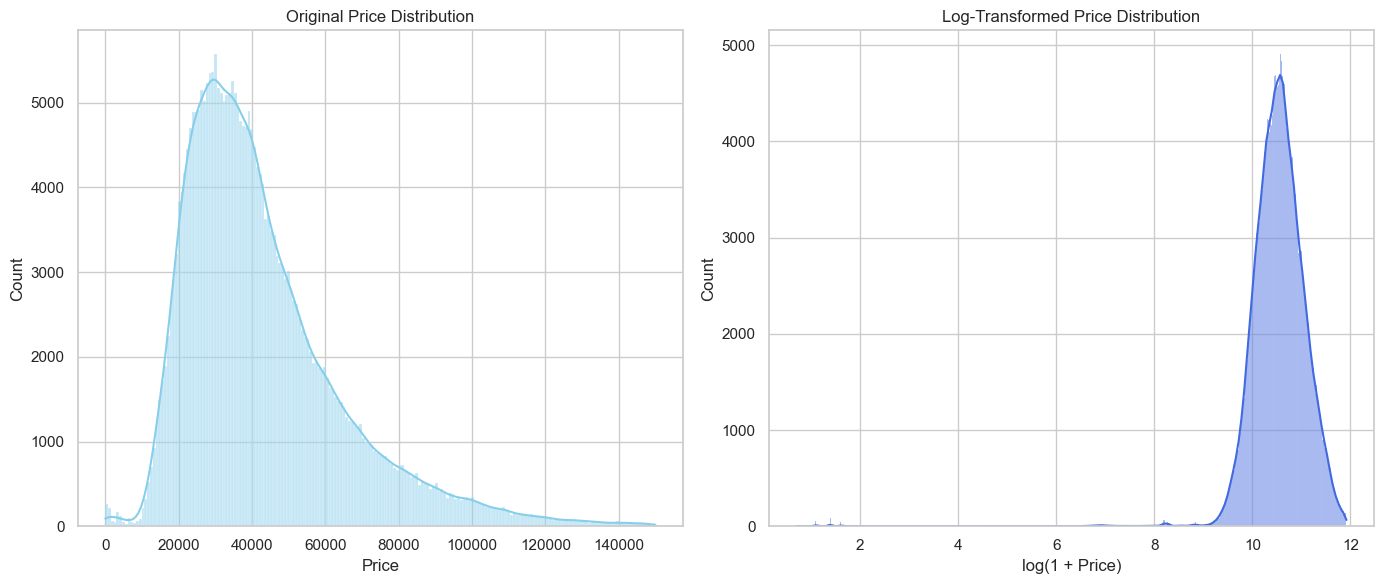

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(df['price'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Original Price Distribution')
axes[0].set_xlabel('Price')

sns.histplot(df['price_log'], kde=True, color='royalblue', ax=axes[1])
axes[1].set_title('Log-Transformed Price Distribution')
axes[1].set_xlabel('log(1 + Price)')

plt.tight_layout()
plt.show()

In [33]:
#查看偏斜？
skewness_result = df.skew()
print(skewness_result)

tradeTime                                                         -0.55141
followers                                                         6.029273
price                                                             1.371852
square                                                            1.742679
livingRoom                                                        0.508321
drawingRoom                                                       0.348087
kitchen                                                          -4.300577
bathRoom                                                          2.124816
buildingType                                                     -0.844769
constructionTime                                                 -0.866247
renovationCondition                                              -0.254385
buildingStructure                                                 -0.46636
ladderRatio                                                     372.441942
elevator                 

In [34]:
df.dtypes

tradeTime                                                         int64
followers                                                         int64
price                                                           float64
square                                                          float64
livingRoom                                                        int64
drawingRoom                                                       int64
kitchen                                                         float64
bathRoom                                                          int64
buildingType                                                    float64
constructionTime                                                float64
renovationCondition                                               int64
buildingStructure                                                 int64
ladderRatio                                                     float64
elevator                                                        

In [35]:
#异常值查看
#对于我z-score而言，只要有一行中有一列是异常的，就会被整行列出来
features_to_exclude = ['livingRoom', 'drawingRoom', 'kitchen', 'bathRoom']
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in features_to_exclude]
z_scores = pd.DataFrame()

for column in numerical_columns:
    z_scores[column] = stats.zscore(df[column])

z_score_threshold = 3

outliers = (z_scores.abs() > z_score_threshold)

outliers_rows = df[outliers.any(axis=1)]
print(outliers_rows)

        tradeTime  followers    price  square  livingRoom  drawingRoom  \
1            2016        126  43436.0  132.38           2            2   
2            2016         48  52021.0  198.00           3            2   
3            2016        138  22202.0  134.00           3            1   
4            2016        286  48396.0   81.00           2            1   
6            2016        167  37672.0   73.00           2            1   
...           ...        ...      ...     ...         ...          ...   
277412       2012          0  51030.0   68.00           3            1   
277416       2012          0  54905.0   58.92           1            1   
277418       2012          0  38675.0   72.40           2            1   
277419       2012          0  52739.0   42.00           2            1   
277420       2012          0  46707.0   50.10           2            1   

        kitchen  bathRoom  buildingType  constructionTime  ...  \
1           1.0         2           1.0      

In [36]:
#清理Z-score异常值
df.drop(df[outliers.any(axis=1)].index, inplace=True)#只要某一行中任意一个字段的 z-score > 3，就会被删除

In [37]:
df

,tradeTime,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,...,communityAverage,distance,Age,floorType,floorHeight,room_count,room_ratio,north_south,Investment in residential real estate development in Beijing,price_log
0,2016,106,31680.0,131.00,2,1,1.0,1,1.0,2005.0,...,56021.0,14.385302,11,4.0,26,5.0,26.200000,1,25.983809,10.363472
5,2016,57,52000.0,53.00,1,0,1.0,1,4.0,2005.0,...,67738.0,11.314157,11,3.0,8,3.0,17.666667,1,25.983809,10.859018
10,2016,74,26250.0,48.00,1,1,1.0,1,3.0,2009.0,...,44235.0,31.589868,7,4.0,6,4.0,12.000000,1,25.983809,10.175459
12,2016,90,35568.0,80.13,1,1,1.0,1,1.0,2001.0,...,53588.0,9.113158,15,2.0,23,4.0,20.032500,-1,25.983809,10.479230
13,2016,76,60607.0,59.40,2,1,1.0,1,1.0,1990.0,...,59395.0,5.560342,26,3.0,19,5.0,11.880000,-1,25.983809,11.012182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,2012,0,29428.0,57.09,3,1,1.0,1,4.0,1982.0,...,84021.0,4.488653,30,3.0,5,6.0,9.515000,-1,25.815782,10.289736
277425,2012,0,32664.0,71.64,3,1,1.0,1,4.0,1996.0,...,104198.0,2.149080,16,3.0,9,6.0,11.940000,-1,25.815782,10.394059
277426,2012,0,34270.0,101.84,2,2,1.0,1,1.0,1999.0,...,86359.0,2.602217,13,3.0,5,6.0,16.973333,-1,25.815782,10.442055
277427,2012,0,27068.0,53.20,2,1,1.0,1,4.0,1986.0,...,79570.0,3.855649,26,3.0,24,5.0,10.640000,-1,25.815782,10.206144


In [38]:
#TODO IQR删除的行太多了，删除10万行，不采用
# #同z-score一样
# Q1 = df[numerical_columns].quantile(0.25)
# Q3 = df[numerical_columns].quantile(0.75)
# IQR = Q3 - Q1
#
# outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
#
# outliers_iqr_rows = df[outliers_iqr.any(axis=1)]
# print(outliers_iqr_rows)
# # df.drop(df[outliers.any(axis=1)].index, inplace=True)#只要某一行中任意一个字段的 z-score > 3，就会被删除
# df.drop(df[outliers_iqr.any(axis=1)].index, inplace=True)#只要某一行中任意一个字段落在 IQR 范围之外，也会被删除

In [39]:
#之前没有清理房间数量，现在进行清理
total_threshold = (df['livingRoom'] * 10 + df['drawingRoom'] * 10
                   + df['kitchen'] * 5 + df['bathRoom'] * 3)

rows_to_clean = df[df['square'] < total_threshold]

print(rows_to_clean)


cleaned_df = df[df['square'] >= total_threshold]

        tradeTime  followers     price  square  livingRoom  drawingRoom  \
2233         2016         20   49190.0   37.00           2            1   
2859         2016         49   31082.0   37.00           2            1   
2963         2016         28   46945.0   36.00           2            1   
5340         2016         70  104648.0   29.91           1            1   
5399         2016         14   58334.0   48.00           3            2   
...           ...        ...       ...     ...         ...          ...   
276958       2012          0   48457.0   27.86           1            1   
277128       2012          0   34266.0   36.48           2            1   
277186       2012          0   51892.0   37.00           2            1   
277321       2012          0   43946.0   32.54           2            0   
277410       2012          0   29389.0   25.52           1            1   

        kitchen  bathRoom  buildingType  constructionTime  ...  \
2233        1.0         1        

In [40]:
df

,tradeTime,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,...,communityAverage,distance,Age,floorType,floorHeight,room_count,room_ratio,north_south,Investment in residential real estate development in Beijing,price_log
0,2016,106,31680.0,131.00,2,1,1.0,1,1.0,2005.0,...,56021.0,14.385302,11,4.0,26,5.0,26.200000,1,25.983809,10.363472
5,2016,57,52000.0,53.00,1,0,1.0,1,4.0,2005.0,...,67738.0,11.314157,11,3.0,8,3.0,17.666667,1,25.983809,10.859018
10,2016,74,26250.0,48.00,1,1,1.0,1,3.0,2009.0,...,44235.0,31.589868,7,4.0,6,4.0,12.000000,1,25.983809,10.175459
12,2016,90,35568.0,80.13,1,1,1.0,1,1.0,2001.0,...,53588.0,9.113158,15,2.0,23,4.0,20.032500,-1,25.983809,10.479230
13,2016,76,60607.0,59.40,2,1,1.0,1,1.0,1990.0,...,59395.0,5.560342,26,3.0,19,5.0,11.880000,-1,25.983809,11.012182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,2012,0,29428.0,57.09,3,1,1.0,1,4.0,1982.0,...,84021.0,4.488653,30,3.0,5,6.0,9.515000,-1,25.815782,10.289736
277425,2012,0,32664.0,71.64,3,1,1.0,1,4.0,1996.0,...,104198.0,2.149080,16,3.0,9,6.0,11.940000,-1,25.815782,10.394059
277426,2012,0,34270.0,101.84,2,2,1.0,1,1.0,1999.0,...,86359.0,2.602217,13,3.0,5,6.0,16.973333,-1,25.815782,10.442055
277427,2012,0,27068.0,53.20,2,1,1.0,1,4.0,1986.0,...,79570.0,3.855649,26,3.0,24,5.0,10.640000,-1,25.815782,10.206144


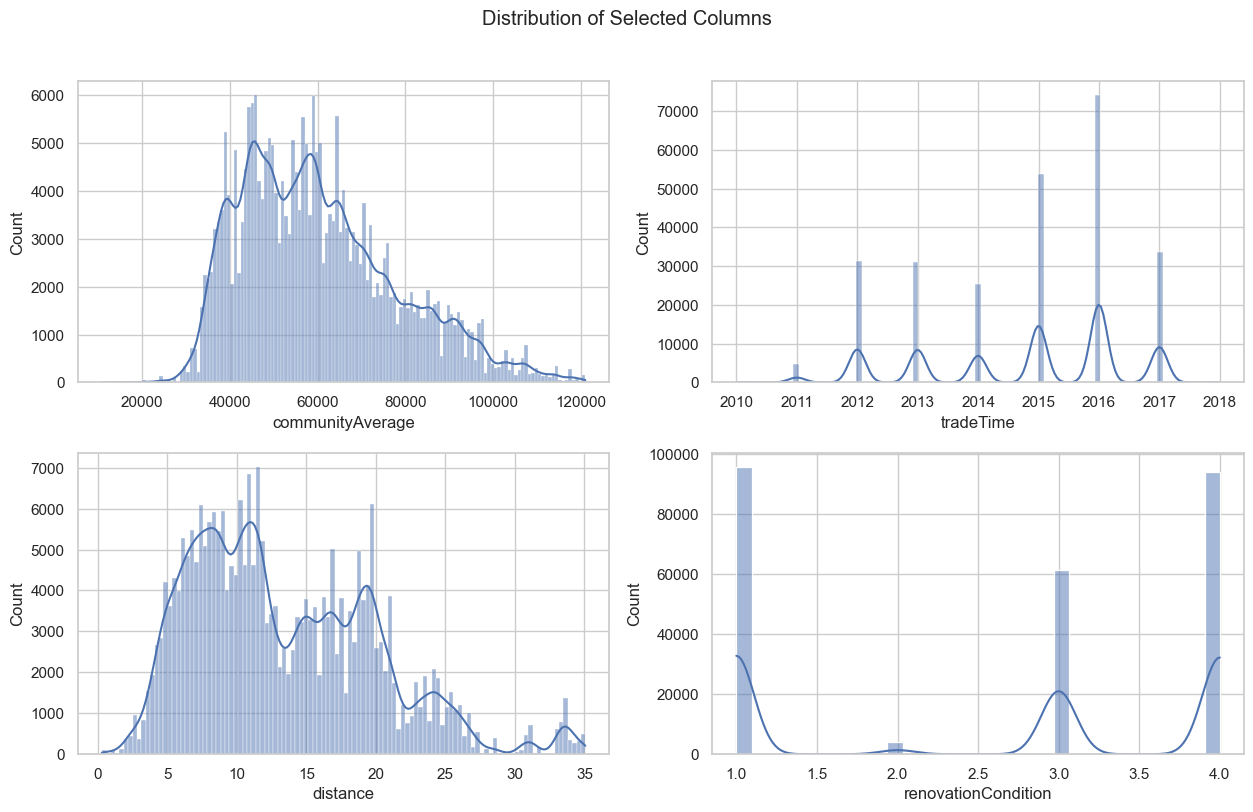

<class 'pandas.core.frame.DataFrame'>
Index: 254590 entries, 0 to 277428
Data columns (total 27 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   tradeTime                                                     254590 non-null  int64  
 1   followers                                                     254590 non-null  int64  
 2   price                                                         254590 non-null  float64
 3   square                                                        254590 non-null  float64
 4   livingRoom                                                    254590 non-null  int64  
 5   drawingRoom                                                   254590 non-null  int64  
 6   kitchen                                                       254590 non-null  float64
 7   bathRoom                                                     

In [41]:
selected_columns = ['communityAverage', 'tradeTime', 'distance', 'renovationCondition']
selected_data = df[selected_columns]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12.7,8.27))
fig.suptitle('Distribution of Selected Columns')

for i, col in enumerate(selected_columns):
    sns.histplot(selected_data[col], kde=True, ax=axes[i // 2, i % 2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
df.info()

In [42]:
#再次查看我的price分布以及取对数后的分布

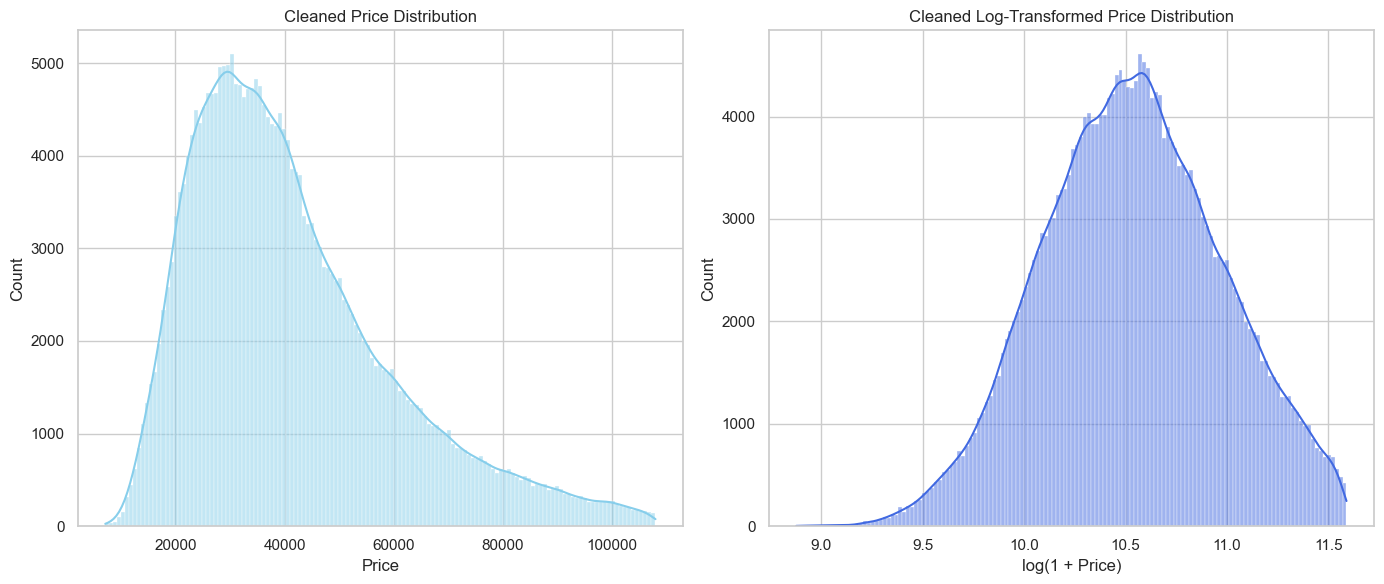

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
sns.set(style="whitegrid")

# 创建画布并并排两个图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 原始价格分布
sns.histplot(df['price'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Cleaned Price Distribution')
axes[0].set_xlabel('Price')

# 对数变换后的价格分布
sns.histplot(df['price_log'], kde=True, color='royalblue', ax=axes[1])
axes[1].set_title('Cleaned Log-Transformed Price Distribution')
axes[1].set_xlabel('log(1 + Price)')

# 自动布局
plt.tight_layout()
plt.show()

In [44]:
df

,tradeTime,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,...,communityAverage,distance,Age,floorType,floorHeight,room_count,room_ratio,north_south,Investment in residential real estate development in Beijing,price_log
0,2016,106,31680.0,131.00,2,1,1.0,1,1.0,2005.0,...,56021.0,14.385302,11,4.0,26,5.0,26.200000,1,25.983809,10.363472
5,2016,57,52000.0,53.00,1,0,1.0,1,4.0,2005.0,...,67738.0,11.314157,11,3.0,8,3.0,17.666667,1,25.983809,10.859018
10,2016,74,26250.0,48.00,1,1,1.0,1,3.0,2009.0,...,44235.0,31.589868,7,4.0,6,4.0,12.000000,1,25.983809,10.175459
12,2016,90,35568.0,80.13,1,1,1.0,1,1.0,2001.0,...,53588.0,9.113158,15,2.0,23,4.0,20.032500,-1,25.983809,10.479230
13,2016,76,60607.0,59.40,2,1,1.0,1,1.0,1990.0,...,59395.0,5.560342,26,3.0,19,5.0,11.880000,-1,25.983809,11.012182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277424,2012,0,29428.0,57.09,3,1,1.0,1,4.0,1982.0,...,84021.0,4.488653,30,3.0,5,6.0,9.515000,-1,25.815782,10.289736
277425,2012,0,32664.0,71.64,3,1,1.0,1,4.0,1996.0,...,104198.0,2.149080,16,3.0,9,6.0,11.940000,-1,25.815782,10.394059
277426,2012,0,34270.0,101.84,2,2,1.0,1,1.0,1999.0,...,86359.0,2.602217,13,3.0,5,6.0,16.973333,-1,25.815782,10.442055
277427,2012,0,27068.0,53.20,2,1,1.0,1,4.0,1986.0,...,79570.0,3.855649,26,3.0,24,5.0,10.640000,-1,25.815782,10.206144


In [46]:
df.dtypes

tradeTime                                                         int64
followers                                                         int64
price                                                           float64
square                                                          float64
livingRoom                                                        int64
drawingRoom                                                       int64
kitchen                                                         float64
bathRoom                                                          int64
buildingType                                                    float64
constructionTime                                                float64
renovationCondition                                               int64
buildingStructure                                                 int64
ladderRatio                                                     float64
elevator                                                        

In [259]:
# df.to_csv("最终干净的数据.csv",index=False)
# 保存为 CSV 文件
df.to_csv('C:\\Users\\ASUS\\Desktop\\IOM魔改2\\IOM209\\最终干净的数据改.csv', index=False)
